## Import Library

In [1]:
#buat fungsi untuk reduce memory.
#intinya adalah iterasi keseluruh kolom pada dataframe dan mengubah datatype yg memorynya paling kecil.
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#fungsi untuk memanggil dataframe
def import_data(file):
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [3]:
app_train = pd.read_csv('application_train.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = pd.read_csv('application_test.csv')
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
install_pay = pd.read_csv('installments_payments.csv')
install_pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [8]:
credit_card = pd.read_csv('credit_card_balance.csv')
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
pos_cash_balance =pd.read_csv('POS_CASH_balance.csv')
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [10]:
prev_app = pd.read_csv('previous_application.csv')
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Merge Data

In [11]:
#cari nilai yang berbeda dari kategorikal features app_train dan app_test
for col in app_train.columns[app_train.dtypes == 'object']:
    c_train = set(app_train[col].unique())
    c_test = set(app_test[col].unique())
    diff = c_train - c_test
    if len(diff) > 0:
        print('feature ' + col + ' has different values: ', diff)

feature CODE_GENDER has different values:  {'XNA'}
feature NAME_INCOME_TYPE has different values:  {'Maternity leave'}
feature NAME_FAMILY_STATUS has different values:  {'Unknown'}


In [12]:
#ubah fitur tersebut menjadi null values.
#karena kalo ga diubah nanti error.
app_train['CODE_GENDER'] = app_train['CODE_GENDER'].map(lambda x: x if x != 'XNA' else np.nan)
app_train['NAME_INCOME_TYPE'] = app_train['NAME_INCOME_TYPE'].map(lambda x: x if x != 'Maternity leave' else np.nan)
app_train['NAME_FAMILY_STATUS'] = app_train['NAME_FAMILY_STATUS'].map(lambda x: x if x != 'Unknown' else np.nan)

In [13]:
for col in app_train.columns[app_train.dtypes == 'object']:
    d = app_train[col].value_counts()
    if app_train[col].nunique() == 2:
        d[0] = 0
        d[1] = 1      
    app_train[col] = app_train[col].map(d)
    app_test[col] = app_test[col].map(d)

In [14]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1.0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0.0,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1.0,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0.0,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1.0,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,0,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,0,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,1,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
label = LabelEncoder()

In [17]:
#labeling kategorikal values
for col in bureau.columns[bureau.dtypes=='object']:
    bureau[col] = label.fit_transform(bureau[col])

In [18]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,2,0,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,3,-131,NaN
1,215354,5714463,0,0,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,4,-20,NaN
2,215354,5714464,0,0,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,3,-16,NaN
3,215354,5714465,0,0,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,4,-16,NaN
4,215354,5714466,0,0,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,3,-21,NaN


In [19]:
#one hot encoding kategorikal values
for val in bureau_balance['STATUS'].unique():
    bureau_balance['STATUS_' + val] = (bureau_balance['STATUS'] == val).map(int)

bureau_balance.drop(columns=['STATUS'], inplace = True)
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_C,STATUS_0,STATUS_X,STATUS_1,STATUS_2,STATUS_3,STATUS_5,STATUS_4
0,5715448,0,1,0,0,0,0,0,0,0
1,5715448,-1,1,0,0,0,0,0,0,0
2,5715448,-2,1,0,0,0,0,0,0,0
3,5715448,-3,1,0,0,0,0,0,0,0
4,5715448,-4,1,0,0,0,0,0,0,0


In [20]:
bureau_balance.shape

(27299925, 10)

In [21]:
#gabungin bureau dan bureau_balance
#saya gabungin seperti ini dengan tujuan agar jumlah data tetap mengikuti induk yaitu bureau.
for col in bureau_balance.drop(columns=['SK_ID_BUREAU']).columns:
    res = bureau_balance.groupby(by = 'SK_ID_BUREAU')[col].mean()
    bureau['Balance_' + str(col)] = bureau['SK_ID_BUREAU'].map(lambda x: res[x] if x in res.index else np.nan)

In [22]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_ANNUITY,Balance_MONTHS_BALANCE,Balance_STATUS_C,Balance_STATUS_0,Balance_STATUS_X,Balance_STATUS_1,Balance_STATUS_2,Balance_STATUS_3,Balance_STATUS_5,Balance_STATUS_4
0,215354,5714462,2,0,-497,0,-153.0,-153.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,0,0,-208,0,1075.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,0,0,-203,0,528.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,0,0,-203,0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,0,0,-629,0,1197.0,NaN,77674.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#labeling
credit_card['NAME_CONTRACT_STATUS'] = label.fit_transform(credit_card['NAME_CONTRACT_STATUS'])

In [24]:
#labeling
pos_cash_balance['NAME_CONTRACT_STATUS'] = label.fit_transform(pos_cash_balance['NAME_CONTRACT_STATUS'])

In [25]:
#labeling manual karena kalo pake label encoder error gatau kenapa hehe.
for col in prev_app.columns[prev_app.dtypes == 'object']:
    if prev_app[col].nunique() == 2:
        d = prev_app[col].value_counts()
        prev_app[col] = prev_app[col].map({d[0]: 0, d[1]: 1})
    else:        
        for val in prev_app[col].unique():
            prev_app[str(col) + '_' + str(val)] = (prev_app[col] == val).map(int)
        prev_app.drop(columns=col, inplace = True)

In [26]:
prev_app.shape

(1670214, 165)

In [27]:
#gabungin install_pay dan prev_app
for col in install_pay.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).columns:
    res = install_pay.groupby(by = 'SK_ID_PREV')[col].mean()
    prev_app['IP_' + col] = prev_app['SK_ID_PREV'].map(lambda x: res[x] if x in res.index else np.nan)

In [28]:
prev_app.shape

(1670214, 171)

In [29]:
#gabungin prev app dan credit_card
for col in credit_card.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).columns:
    res = credit_card.groupby(by = 'SK_ID_PREV')[col].mean()
    prev_app['CCB_' + col] = prev_app['SK_ID_PREV'].map(lambda x: res[x] if x in res.index else np.nan)

In [30]:
prev_app.shape

(1670214, 192)

In [31]:
#gabungin pos_cah dengan prev app
for col in pos_cash_balance.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).columns:
    res = pos_cash_balance.groupby(by = 'SK_ID_PREV')[col].mean()
    prev_app['POS_' + col] = prev_app['SK_ID_PREV'].map(lambda x: res[x] if x in res.index else np.nan)

In [32]:
prev_app.shape

(1670214, 198)

In [33]:
prev_app_merged = prev_app.copy()
bureau_merged = bureau.copy()

In [34]:
for col in bureau_merged.drop(columns = ['SK_ID_CURR', 'SK_ID_BUREAU']).columns:
    res = bureau_merged.groupby(by = 'SK_ID_CURR')[col].mean()
    app_train['Bureau_' + str(col)] = bureau_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)
    app_test['Bureau_' + str(col)] = bureau_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)

In [35]:
app_train.shape

(307511, 146)

In [36]:
app_test.shape

(48744, 145)

In [37]:
for col in prev_app_merged.drop(columns=['SK_ID_CURR', 'SK_ID_PREV']).columns:
    res = prev_app_merged.groupby(by = 'SK_ID_CURR')[col].mean()
    app_train['Prev_' + str(col)] = prev_app_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)
    app_test['Prev_' + str(col)] = prev_app_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)

In [38]:
app_train.shape

(307511, 342)

In [39]:
app_test.shape

(48744, 341)

In [40]:
app_train.to_csv('train_fix.csv')

In [41]:
app_test.to_csv('test_fix.csv')

In [42]:
df_train = pd.read_csv('train_fix.csv')
df_train.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,Prev_CCB_CNT_INSTALMENT_MATURE_CUM,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF
0,0,100002,1,0,1.0,0,0,0,202500.0,406597.5,...,NaN,NaN,NaN,NaN,-8.250000,8.083333,6.500000,1.785714,0.000000,0.000000
1,1,100003,0,0,0.0,0,1,0,270000.0,1293502.5,...,6.666667,0.064516,0.0,0.0,-19.000000,17.630769,14.497436,0.656410,0.000000,0.000000
2,2,100004,0,1,1.0,1,0,0,67500.0,135000.0,...,12.782051,0.000000,0.0,0.0,-43.500000,8.500000,4.916667,0.333333,0.000000,0.000000
3,3,100006,0,0,0.0,0,0,0,135000.0,312682.5,...,NaN,NaN,NaN,NaN,-33.416667,12.400253,6.796086,0.456805,0.000000,0.000000
4,4,100007,0,0,1.0,0,0,0,121500.0,513000.0,...,3.600000,0.000000,0.0,0.0,-26.428571,11.333333,8.111111,0.461190,0.126984,0.126984


In [43]:
df_test = pd.read_csv('test_fix.csv')
df_test.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Prev_CCB_CNT_INSTALMENT_MATURE_CUM,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF
0,0,100001,0,0,0,0,0,135000.0,568800.0,20560.5,...,NaN,NaN,NaN,NaN,-8.250000,8.083333,6.500000,1.785714,0.000000,0.000000
1,1,100005,0,1,0,0,0,99000.0,222768.0,17370.0,...,6.666667,0.064516,0.0,0.0,-19.000000,17.630769,14.497436,0.656410,0.000000,0.000000
2,2,100013,0,1,1,0,0,202500.0,663264.0,69777.0,...,12.782051,0.000000,0.0,0.0,-43.500000,8.500000,4.916667,0.333333,0.000000,0.000000
3,3,100028,0,0,0,0,2,315000.0,1575000.0,49018.5,...,NaN,NaN,NaN,NaN,-33.416667,12.400253,6.796086,0.456805,0.000000,0.000000
4,4,100038,0,1,1,1,1,180000.0,625500.0,32067.0,...,3.600000,0.000000,0.0,0.0,-26.428571,11.333333,8.111111,0.461190,0.126984,0.126984


In [44]:
df_train.shape

(307511, 343)

In [45]:
df_test.shape

(48744, 342)

In [46]:
df_train.describe()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,Prev_CCB_CNT_INSTALMENT_MATURE_CUM,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF
count,307511.000000,307511.000000,307511.000000,307511.000000,307507.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,...,119167.000000,119167.000000,119167.000000,119167.000000,305638.000000,305627.000000,305627.000000,305638.000000,305638.000000,305638.000000
mean,153755.000000,278180.518577,0.080729,0.095213,0.341648,0.340108,0.306327,0.417052,1.687979e+05,5.990260e+05,...,7.466501,0.098154,1.846103,0.027646,-31.339413,14.751614,9.873680,0.466226,1.011514,0.052588
std,88770.923652,102790.175348,0.272419,0.293509,0.474263,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,...,10.699362,0.302932,27.420810,0.898315,16.365289,7.195734,6.312358,0.349640,17.797316,0.270019
min,0.000000,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,...,0.000000,0.000000,0.000000,0.000000,-94.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,76877.500000,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,...,0.000000,0.000000,0.000000,0.000000,-42.000000,9.812500,5.555556,0.265260,0.000000,0.000000
50%,153755.000000,278202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,...,3.000000,0.000000,0.000000,0.000000,-30.300000,12.708333,7.944444,0.397967,0.000000,0.000000
75%,230632.500000,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,...,9.937500,0.000000,0.000000,0.000000,-18.500000,18.000000,12.500000,0.580417,0.000000,0.000000
max,307510.000000,456255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,...,48.000000,6.000000,1173.792683,233.368421,-1.000000,72.000000,60.000000,7.000000,1160.170455,28.680401


In [47]:
df_test.describe()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Prev_CCB_CNT_INSTALMENT_MATURE_CUM,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF
count,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,...,18668.000000,18668.000000,18668.000000,18668.000000,48449.000000,48447.000000,48447.000000,48449.000000,48449.000000,48449.000000
mean,24371.500000,277796.676350,0.009006,0.329600,0.337129,0.309495,0.397054,1.784318e+05,5.167404e+05,29426.240209,...,7.262024,0.096477,1.762529,0.021044,-31.282889,14.760160,9.884120,0.465281,1.085100,0.052875
std,14071.325098,103169.547296,0.094474,0.470073,0.472734,0.462290,0.709047,1.015226e+05,3.653970e+05,16016.368315,...,10.604825,0.293896,26.656430,0.232170,16.425587,7.249357,6.350133,0.349062,18.742808,0.253597
min,0.000000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,...,0.000000,0.000000,0.000000,0.000000,-94.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12185.750000,188557.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.606400e+05,17973.000000,...,0.000000,0.000000,0.000000,0.000000,-42.000000,9.835606,5.567460,0.264957,0.000000,0.000000
50%,24371.500000,277549.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,...,2.800000,0.000000,0.000000,0.000000,-30.250000,12.666667,7.958333,0.396337,0.000000,0.000000
75%,36557.250000,367555.500000,0.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,6.750000e+05,37390.500000,...,9.500000,0.000000,0.000000,0.000000,-18.250000,18.000000,12.500000,0.578348,0.000000,0.000000
max,48743.000000,456250.000000,1.000000,1.000000,1.000000,1.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,...,47.778947,6.000000,830.395349,24.529412,-1.000000,60.380000,60.000000,6.500000,1127.021739,9.250000


In [48]:
data = df_train.append(df_test)

In [49]:
data.shape

(356255, 343)

## Data Pre-Processing

### Handling Missing Values

In [50]:
#Karena di df_test tidak ada di feature target maka nilainya Nan semua.
data['TARGET'][307511:]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
48739   NaN
48740   NaN
48741   NaN
48742   NaN
48743   NaN
Name: TARGET, Length: 48744, dtype: float64

In [51]:
#hapus kolom target
data_2 = data.drop(columns=['TARGET'])
data_2.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Prev_CCB_CNT_INSTALMENT_MATURE_CUM,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF
0,0,100002,0,1.0,0,0,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,-8.250000,8.083333,6.500000,1.785714,0.000000,0.000000
1,1,100003,0,0.0,0,1,0,270000.0,1293502.5,35698.5,...,6.666667,0.064516,0.0,0.0,-19.000000,17.630769,14.497436,0.656410,0.000000,0.000000
2,2,100004,1,1.0,1,0,0,67500.0,135000.0,6750.0,...,12.782051,0.000000,0.0,0.0,-43.500000,8.500000,4.916667,0.333333,0.000000,0.000000
3,3,100006,0,0.0,0,0,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,-33.416667,12.400253,6.796086,0.456805,0.000000,0.000000
4,4,100007,0,1.0,0,0,0,121500.0,513000.0,21865.5,...,3.600000,0.000000,0.0,0.0,-26.428571,11.333333,8.111111,0.461190,0.126984,0.126984


In [52]:
#Persentase total data yang missing dari data
sum(data_2.isna().sum())/(data_2.shape[0]*data_2.shape[1])*100

15.244869857577047

In [53]:
#10 besar feature yang memiliki persentase data missing yang paling tinggi.
data_missing = pd.DataFrame(data_2.isnull().sum() / len(data_2)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
Prev_FLAG_LAST_APPL_PER_CONTRACT,1.000000
Prev_RATE_INTEREST_PRIVILEGED,0.981937
Prev_RATE_INTEREST_PRIMARY,0.981937
Prev_CCB_AMT_PAYMENT_CURRENT,0.740916
Prev_CCB_AMT_DRAWINGS_OTHER_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_ATM_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_ATM_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_OTHER_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_POS_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_POS_CURRENT,0.740781


In [54]:
#kolom yang memiliki persentase data missing diatas 70% akan saya drop.
drop = data_missing[data_missing[0] > 0.7]
drop

,0
Prev_FLAG_LAST_APPL_PER_CONTRACT,1.000000
Prev_RATE_INTEREST_PRIVILEGED,0.981937
Prev_RATE_INTEREST_PRIMARY,0.981937
Prev_CCB_AMT_PAYMENT_CURRENT,0.740916
Prev_CCB_AMT_DRAWINGS_OTHER_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_ATM_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_ATM_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_OTHER_CURRENT,0.740781
Prev_CCB_CNT_DRAWINGS_POS_CURRENT,0.740781
Prev_CCB_AMT_DRAWINGS_POS_CURRENT,0.740781


In [55]:
data_2.drop(columns=drop.index, inplace=True)
data_2.shape

(356255, 332)

In [56]:
#sisanya akan saya isi dengan median.
for feature in  data_missing[(data_missing[0] > 0) & (data_missing[0] <= 0.7)].index:
    data_2[feature] = data_2[feature].fillna(data_2[feature].median())

In [57]:
#cek lagi
sum(data_2.isna().sum())/(data_2.shape[0]*data_2.shape[1])*100

0.0

data tidak terdapat missing

## Handling Variables with Small Variances

In [59]:
small_variance = data_2.columns[(data_2.std(axis = 0) < .01).values]
small_variance

Index(['FLAG_MOBIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_12', 'Bureau_Balance_STATUS_2',
       'Bureau_Balance_STATUS_3', 'Bureau_Balance_STATUS_4',
       'Prev_NAME_CONTRACT_TYPE_XNA',
       'Prev_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
       'Prev_NAME_CASH_LOAN_PURPOSE_Buying a garage',
       'Prev_NAME_CASH_LOAN_PURPOSE_Business development',
       'Prev_NAME_CASH_LOAN_PURPOSE_Hobby',
       'Prev_NAME_CASH_LOAN_PURPOSE_Gasification / water supply',
       'Prev_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal',
       'Prev_NAME_CASH_LOAN_PURPOSE_Money for a third person',
       'Prev_NAME_TYPE_SUITE_nan', 'Prev_NAME_GOODS_CATEGORY_Education',
       'Prev_NAME_GOODS_CATEGORY_Fitness',
       'Prev_NAME_GOODS_CATEGORY_Insurance',
       'Prev_NAME_GOODS_CATEGORY_Additional Service',
       'Prev_NAME_GOODS_CATEGORY_Weapon', 'Prev_NAME_GOODS_CATEGORY_Animals',
       'Prev_NAME_GOODS_CATEGORY_House Construction',
     

In [60]:
data_2.drop(columns = small_variance, inplace=True)

In [61]:
data_2.shape

(356255, 305)

In [62]:
# mengembalikan data Target
data_2['TARGET'] = data['TARGET']

In [63]:
data_2.shape

(356255, 306)

In [64]:
data_2['TARGET']

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48739    NaN
48740    NaN
48741    NaN
48742    NaN
48743    NaN
Name: TARGET, Length: 356255, dtype: float64

In [65]:
data_final = data_2.copy()

In [66]:
data_final.to_csv('data_final.csv')

## Data Visualization

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data_final.shape

(356255, 306)

In [76]:
data = pd.read_csv('data_final.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF,TARGET
0,0,0,100002,0,1.0,0,0,0,202500.0,406597.5,...,0.000000,0.0,0.0,-8.250000,8.083333,6.500000,1.785714,0.000000,0.000000,1.0
1,1,1,100003,0,0.0,0,1,0,270000.0,1293502.5,...,0.064516,0.0,0.0,-19.000000,17.630769,14.497436,0.656410,0.000000,0.000000,0.0
2,2,2,100004,1,1.0,1,0,0,67500.0,135000.0,...,0.000000,0.0,0.0,-43.500000,8.500000,4.916667,0.333333,0.000000,0.000000,0.0
3,3,3,100006,0,0.0,0,0,0,135000.0,312682.5,...,0.000000,0.0,0.0,-33.416667,12.400253,6.796086,0.456805,0.000000,0.000000,0.0
4,4,4,100007,0,1.0,0,0,0,121500.0,513000.0,...,0.000000,0.0,0.0,-26.428571,11.333333,8.111111,0.461190,0.126984,0.126984,0.0


In [77]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [78]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,Prev_CCB_NAME_CONTRACT_STATUS,Prev_CCB_SK_DPD,Prev_CCB_SK_DPD_DEF,Prev_POS_MONTHS_BALANCE,Prev_POS_CNT_INSTALMENT,Prev_POS_CNT_INSTALMENT_FUTURE,Prev_POS_NAME_CONTRACT_STATUS,Prev_POS_SK_DPD,Prev_POS_SK_DPD_DEF,TARGET
0,100002,0,1.0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,0.000000,0.0,0.0,-8.250000,8.083333,6.500000,1.785714,0.000000,0.000000,1.0
1,100003,0,0.0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0.064516,0.0,0.0,-19.000000,17.630769,14.497436,0.656410,0.000000,0.000000,0.0
2,100004,1,1.0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,0.000000,0.0,0.0,-43.500000,8.500000,4.916667,0.333333,0.000000,0.000000,0.0
3,100006,0,0.0,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.000000,0.0,0.0,-33.416667,12.400253,6.796086,0.456805,0.000000,0.000000,0.0
4,100007,0,1.0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,0.000000,0.0,0.0,-26.428571,11.333333,8.111111,0.461190,0.126984,0.126984,0.0


In [79]:
#split ke data training dan testing
#karena yang akan divisualisasi hanya data training
data_train = data[:307511]

In [80]:
data_train.shape

(307511, 305)

In [81]:
data_test = data[307511:]

In [82]:
data_test.shape

(48744, 305)

### Percentase Target

In [84]:
target_dist = data_train.groupby("TARGET").size().sort_values(ascending=False)

Text(0.5, 1.0, 'Target')

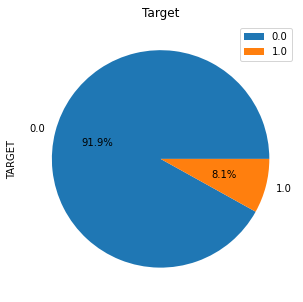

In [86]:
target = pd.DataFrame(data_train['TARGET'].value_counts())
plot = target.plot.pie(y='TARGET', figsize=(8, 5), autopct="%1.1f%%")
plt.title("Target")

### Distribusi Loan Types

In [88]:
name_contract = data_train["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100

In [89]:
name_contract

0    90.478715
1     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

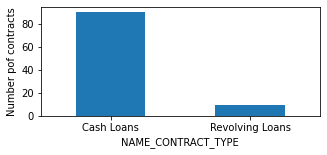

In [90]:
name_contract.plot(kind='bar', figsize=(5,2))

plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Number of contracts')
plt.xticks([0, 1], ["Cash Loans", "Revolving Loans"], rotation="horizontal")

plt.show()

### Distribusi Jumlah Credit

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

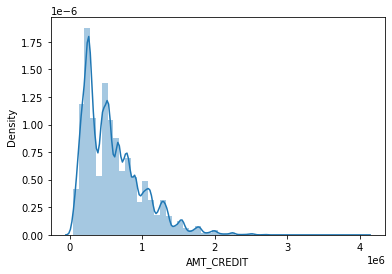

In [119]:
sns.distplot(data_train['AMT_CREDIT'])

## Modeling

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
x = data_train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = data_train['TARGET']

### Membagi data test dan train

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### pendefinisian model

In [112]:
scaler = MinMaxScaler()

In [113]:
x_train = scaler.fit_transform(x_train)

In [114]:
LR = LogisticRegression(solver='liblinear', 
                        C=0.05, 
                        multi_class='ovr', 
                        random_state=0)
LR.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [115]:
x_test=scaler.transform(x_test)

In [116]:
lr_pred = LR.predict(x_test)

In [117]:
print('Score train:',LR.score(x_train, y_train))

Score train: 0.9186977659263114


In [118]:
print('Score test:',LR.score(x_test, y_test))

Score test: 0.9207680926133684
